## Data

In [25]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("../00_DATA/train_dataset.csv")
test_df = pd.read_csv("../00_DATA/test_dataset.csv")
train_df.head(10)


,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,Animation,Fantasy,GameShow,History,Music,...,Sport,War,Western,averageRating,numVotes,budget,revenue,isTopActor,isTopDirector,yearsSinceProduced
0,tt0035423,Kate & Leopold,Kate & Leopold,2001,118,0,1,0,0,0,...,0,0,0,6.4,81936.0,48000000,76019048,1,0,20
1,tt0116391,Gang,Gang,2000,152,0,0,0,0,0,...,0,0,0,6.2,236.0,30000000,41480851,0,0,21
2,tt0118589,Glitter,Glitter,2001,104,0,0,0,0,1,...,0,0,0,2.3,23292.0,22000000,5271666,0,0,20
3,tt0120166,The Sorcerer's Apprentice,The Sorcerer's Apprentice,2001,86,0,1,0,0,0,...,0,0,0,4.5,565.0,150000000,215283742,0,0,20
4,tt0120467,Vulgar,Vulgar,2000,87,0,0,0,0,0,...,0,0,0,5.2,4078.0,120000,14904,0,0,21
5,tt0120630,Chicken Run,Chicken Run,2000,84,1,0,0,0,0,...,0,0,0,7.0,184276.0,45000000,224834564,1,1,21
6,tt0120667,Fantastic Four,Fantastic Four,2005,106,0,1,0,0,0,...,0,0,0,5.7,320223.0,120000000,167977596,0,0,16
7,tt0120681,From Hell,From Hell,2001,122,0,0,0,0,0,...,0,0,0,6.8,151405.0,35000000,74558115,1,0,20
8,tt0120737,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,2001,178,0,0,0,0,0,...,0,0,0,8.8,1744505.0,93000000,871368364,1,1,20
9,tt0120755,Mission: Impossible II,Mission: Impossible II,2000,123,0,0,0,0,0,...,0,0,0,6.1,327345.0,125000000,546388105,1,1,21


## Add new variable (avgRating > 6)

In [3]:
train_df["freshRating"] = pd.Series([1 if x >= 6 else 0 for x in train_df["averageRating"]], index=train_df["averageRating"].index)
test_df["freshRating"] = pd.Series([1 if x >= 6 else 0 for x in test_df["averageRating"]], index=test_df["averageRating"].index)
train_df.head()

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,Animation,Fantasy,GameShow,History,Music,...,War,Western,averageRating,numVotes,budget,revenue,isTopActor,isTopDirector,yearsSinceProduced,freshRating
0,tt0035423,Kate & Leopold,Kate & Leopold,2001,118,0,1,0,0,0,...,0,0,6.4,81936.0,48000000,76019048,1,0,20,1
1,tt0116391,Gang,Gang,2000,152,0,0,0,0,0,...,0,0,6.2,236.0,30000000,41480851,0,0,21,1
2,tt0118589,Glitter,Glitter,2001,104,0,0,0,0,1,...,0,0,2.3,23292.0,22000000,5271666,0,0,20,0
3,tt0120166,The Sorcerer's Apprentice,The Sorcerer's Apprentice,2001,86,0,1,0,0,0,...,0,0,4.5,565.0,150000000,215283742,0,0,20,0
4,tt0120467,Vulgar,Vulgar,2000,87,0,0,0,0,0,...,0,0,5.2,4078.0,120000,14904,0,0,21,0


## Models

### Baseline model

In [4]:
fresh_ratings = train_df[train_df["freshRating"] == 1]
not_fresh_ratings = train_df[train_df["freshRating"] == 0]

print("Fresh ratings: %i, Not fresh: %i" % (len(fresh_ratings), len(not_fresh_ratings)))

Fresh ratings: 3540, Not fresh: 2011


So our baseline model will always predict fresh ratings `freshRating=1`

In [5]:
y_pred_baseline = pd.Series(0, index=test_df.index)
y_test = test_df["freshRating"]

In [6]:
from my_utils import benchmark_model

baseline_benchmark = benchmark_model(y_test, y_pred_baseline, "Baseline model")
baseline_benchmark

,accuracy,TPR,FPR
Baseline model,0.390658,0.0,0.0


### Logistic regression

In [7]:
train_df

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,Animation,Fantasy,GameShow,History,Music,...,War,Western,averageRating,numVotes,budget,revenue,isTopActor,isTopDirector,yearsSinceProduced,freshRating
0,tt0035423,Kate & Leopold,Kate & Leopold,2001,118,0,1,0,0,0,...,0,0,6.4,81936.0,48000000,76019048,1,0,20,1
1,tt0116391,Gang,Gang,2000,152,0,0,0,0,0,...,0,0,6.2,236.0,30000000,41480851,0,0,21,1
2,tt0118589,Glitter,Glitter,2001,104,0,0,0,0,1,...,0,0,2.3,23292.0,22000000,5271666,0,0,20,0
3,tt0120166,The Sorcerer's Apprentice,The Sorcerer's Apprentice,2001,86,0,1,0,0,0,...,0,0,4.5,565.0,150000000,215283742,0,0,20,0
4,tt0120467,Vulgar,Vulgar,2000,87,0,0,0,0,0,...,0,0,5.2,4078.0,120000,14904,0,0,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5546,tt9020558,Hollywood Burn,Hollywood Burn,2006,52,0,0,0,1,0,...,0,0,8.5,38.0,10000000,45779,1,0,15,1
5547,tt9033128,Blood of War,Blood of War,2012,110,0,0,0,0,0,...,1,0,3.6,7.0,35000000,81093313,0,0,9,0
5548,tt9345114,Thirty,Thalathoun,2008,105,0,0,0,1,0,...,0,0,8.9,12.0,40000000,132820716,0,0,13,1
5549,tt9387330,I Love You as a Man,Lei si ai qing,2014,98,0,0,0,0,0,...,0,0,6.2,12.0,41000000,91980359,0,0,7,1


In [8]:
import statsmodels.formula.api as smf

# Build logistic regression model, using (Missing) as the reference level incorportated to the intercept term for all the categorical variables
logreg = smf.logit(formula = 
                ''' freshRating ~ 
                    yearsSinceProduced + 
                    runtimeMinutes + 
                    numVotes + 
                    budget + 
                    revenue + 
                    isTopActor + 
                    isTopDirector + 
                    Animation + 
                    Fantasy + 
                    History + 
                    Music + 
                    Musical + 
                    News + 
                    SciFi + 
                    Sport + 
                    War + 
                    Western
                ''',
                   data = train_df).fit()

Optimization terminated successfully.
         Current function value: 0.579322
         Iterations 7


In [9]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:            freshRating   No. Observations:                 5551
Model:                          Logit   Df Residuals:                     5533
Method:                           MLE   Df Model:                           17
Date:                Fri, 03 Dec 2021   Pseudo R-squ.:                  0.1152
Time:                        09:21:04   Log-Likelihood:                -3215.8
converged:                       True   LL-Null:                       -3634.3
Covariance Type:            nonrobust   LLR p-value:                5.812e-167
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.3436      0.178     -1.929      0.054      -0.693       0.006
yearsSinceProduced    -0.0163      0.007     -2.405      0.016      -0.030      -0.003
runtimeMinutes      

In [11]:
from my_utils import VIF

cols = ["yearsSinceProduced", "runtimeMinutes", "numVotes", "budget", "revenue"]
VIF(train_df, cols)

yearsSinceProduced    1.007074
runtimeMinutes        1.090690
numVotes              1.269622
budget                2.313685
revenue               2.443094
dtype: float64

We observe there is no strong multicollinearity between any of the non-categorical features

In [14]:
# Build logistic regression model, using (Missing) as the reference level incorportated to the intercept term for all the categorical variables
logreg2 = smf.logit(formula = 
                ''' freshRating ~ 
                    yearsSinceProduced + 
                    runtimeMinutes + 
                    numVotes + 
                    budget + 
                    isTopActor + 
                    Fantasy + 
                    History + 
                    Music + 
                    SciFi + 
                    Sport + 
                    War
                ''',
                   data = train_df).fit()

Optimization terminated successfully.
         Current function value: 0.580044
         Iterations 7


In [15]:
print(logreg2.summary())

                           Logit Regression Results                           
Dep. Variable:            freshRating   No. Observations:                 5551
Model:                          Logit   Df Residuals:                     5539
Method:                           MLE   Df Model:                           11
Date:                Fri, 03 Dec 2021   Pseudo R-squ.:                  0.1141
Time:                        09:24:48   Log-Likelihood:                -3219.8
converged:                       True   LL-Null:                       -3634.3
Covariance Type:            nonrobust   LLR p-value:                1.110e-170
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.2910      0.174     -1.668      0.095      -0.633       0.051
yearsSinceProduced    -0.0167      0.007     -2.471      0.013      -0.030      -0.003
runtimeMinutes      

In [19]:
y_prob_logreg = logreg2.predict(test_df)
y_pred_logreg = pd.Series([1 if x >= 0.5 else 0 for x in y_prob_logreg], index=y_prob_logreg.index)

# Benchmark model
logreg_benchmark = benchmark_model(y_test, y_pred_logreg, "Logistic regression")
logreg_benchmark

,accuracy,TPR,FPR
Logistic regression,0.625478,0.907317,0.81413


### CART

In [24]:
y_train = train_df["freshRating"]
X_train = train_df.drop(columns=["freshRating", "averageRating", "tconst", "primaryTitle", "originalTitle", "startYear"])

y_test = test_df["freshRating"]
X_test = test_df.drop(columns=["freshRating", "averageRating", "tconst", "primaryTitle", "originalTitle", "startYear"])


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


# Specify parameters for decision tree classifier
grid_values = {'ccp_alpha': np.linspace(0.0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]} 
            
dtc = DecisionTreeClassifier()

# set up cross-calidation with k-fold method (k=10)
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv=10, verbose=1) 
# default scoring metric to optimize is accuracy, used as default if none given.

# fit model to data
dtc_cv_acc.fit(X_train, y_train)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.02...
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'max_depth': [30], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
            

In [27]:
acc = dtc_cv_acc.cv_results_['mean_test_score'] 
# what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp = dtc_cv_acc.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy': acc}).head(10)

,ccp alpha,Validation Accuracy
0,0.0,0.659878
1,0.0005,0.677892
2,0.001,0.709781
3,0.0015,0.701855
4,0.002,0.699332
5,0.0025,0.698612
6,0.003,0.697170
7,0.0035,0.693927
8,0.004,0.688161
9,0.0045,0.687800


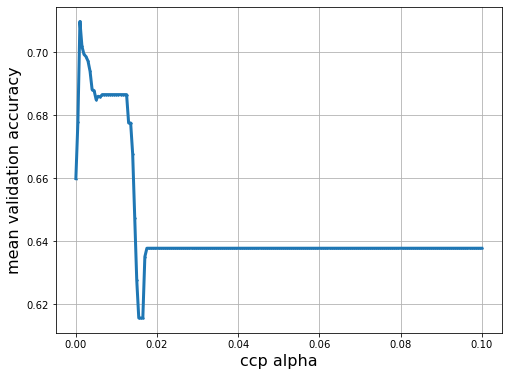

In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp, acc, s=2)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [30]:
print('Grid best parameter ccp_alpha (max. accuracy): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (R2): ', dtc_cv_acc.best_score_)

Grid best parameter ccp_alpha (max. accuracy):  0.001
Grid best score (R2):  0.7097806079460757


In [33]:
dtr = dtc_cv_acc.best_estimator_.fit(X_train, y_train)

Node count = 51


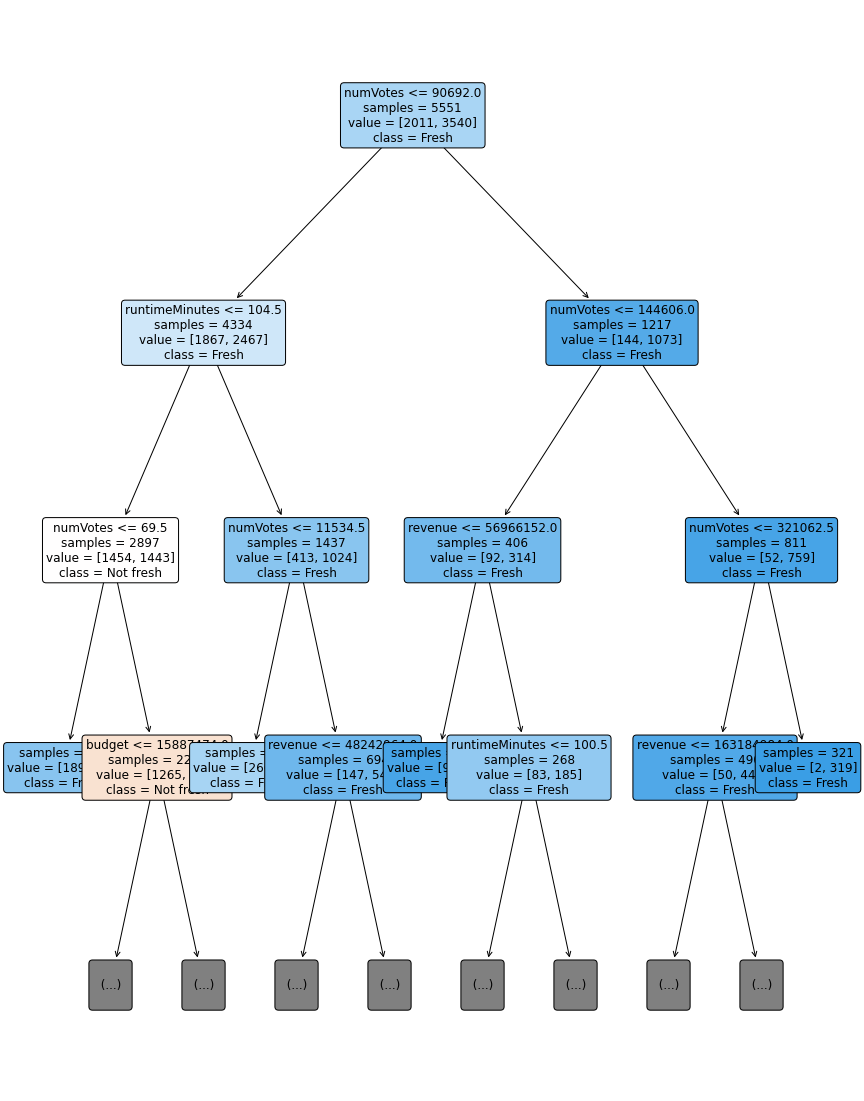

In [35]:
# Plot the tree, we have defines a maximum depth of 3 levels for siplicity of the 
print('Node count =', dtc_cv_acc.best_estimator_.tree_.node_count)
plt.figure(figsize=(15,20))
plot_tree(dtc_cv_acc.best_estimator_, 
          feature_names=X_train.columns, 
          filled=True,
          class_names=["Not fresh", "Fresh"],
          impurity=False,
          rounded=True,
          max_depth=3,
          fontsize=12)
plt.show()

In [36]:
y_pred_cart = dtc_cv_acc.predict(X_test)

# Benchmark model
cart_benchmark = benchmark_model(y_test, y_pred_cart, "CART")
cart_benchmark

,accuracy,TPR,FPR
CART,0.655202,0.755401,0.501087


### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier


grid_values = {'max_features': np.linspace(1,18,18, dtype='int32'),
              'min_samples_leaf': [5],
              'n_estimators': [500],
              'random_state': [88]} 

rf = RandomForestClassifier(random_state=88, verbose=0) 
rf_cv = GridSearchCV(rf, param_grid=grid_values, scoring='accuracy', cv=5)

rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=88),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18], dtype=int32),
                         'min_samples_leaf': [5], 'n_estimators': [500],
                         'random_state': [88]},
             scoring='accuracy')

(1.0, 18.0)

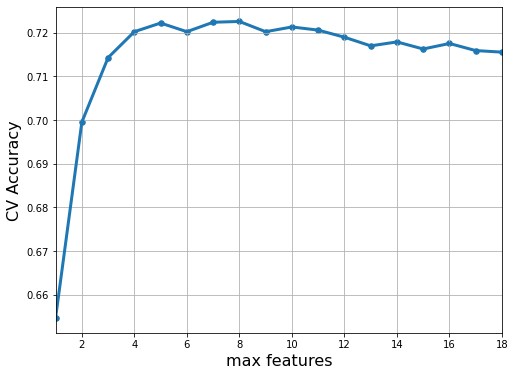

In [40]:
max_features = rf_cv.cv_results_['param_max_features'].data
accuracies = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(max_features, accuracies, s=30)
plt.plot(max_features, accuracies, linewidth=3)
plt.grid(True, which='both')
plt.xlim([1, 18])

In [41]:
max_feat_acc = pd.DataFrame({'max_features' : max_features, 'accuracy': accuracies}).head(10)
max_feat_acc.sort_values(by=['accuracy'], ascending = False)
max_feat_acc

,max_features,accuracy
0,1,0.654652
1,2,0.699511
2,3,0.714284
3,4,0.720227
4,5,0.722210
5,6,0.720228
6,7,0.722389
7,8,0.722569
8,9,0.720227
9,10,0.721308


So `max_features=8`

In [42]:
rf = rf_cv.best_estimator_.fit(X_train, y_train)

In [44]:
y_pred_rf = rf.predict(X_test)

rf_benchmark = benchmark_model(y_test, y_pred_rf, "Random Forest")
rf_benchmark

,accuracy,TPR,FPR
Random Forest,0.667516,0.793728,0.529348


### Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

grid_values = {'max_leaf_nodes': np.linspace(2, 10, 9, dtype='int32'),
               'min_samples_leaf': [10],
               'n_estimators': np.logspace(9, 16, num=8, base=2, dtype='int32'),
               'learning_rate': [0.01],
               'random_state': [88]}


gbr = GradientBoostingClassifier()
gbr_cv = GridSearchCV(gbr, param_grid=grid_values, scoring='accuracy', cv=5)
gbr_cv.fit(X_train, y_train)



In [ ]:
n_estimators = gbr_cv.cv_results_['param_n_estimators'].data
accuracy_scores = gbr_cv.cv_results_['mean_test_score']

plt.figure(figsize=(12, 8))
plt.xlabel('n estimators', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.grid(True, which='both')

N = len(grid_values['max_leaf_nodes'])
M = len(grid_values['n_estimators'])

for i in range(N):
    plt.scatter(n_estimators[(M*i):(M*i)+M], accuracy_scores[(M*i):(M*i)+M], s=30)
    plt.plot(n_estimators[(M*i):(M*i)+M], accuracy_scores[(M*i):(M*i)+M], linewidth=2,
             label='max leaf nodes = '+str(grid_values['max_leaf_nodes'][i]))

plt.legend(loc='lower right')
plt.show()

In [ ]:
print(gbr_cv.best_params_)

In [ ]:
from sklearn.metrics import r2_score

print('CV Accuracy:', round(gbr_cv.best_score_, 5))
print('OSR2:', round(r2_score(y_test, gbr_cv.predict(X_test)), 5))

In [ ]:
boosting = gbr_cv.best_estimator_.fit(X_train, y_train)

In [ ]:
y_pred_boosting = boosting.predict(X_test)

boosting_benchmark = benchmark_model(y_test, y_pred_boosting, "Boosting")
boosting_benchmark

## Accuracies

In [ ]:
pd.concat([
        baseline_benchmark,
        logreg_benchmark,
        cart_benchmark,
        rf_benchmark,
        boosting_benchmark
])

## Bootstrap

In [ ]:
from sklearn.metrics import accuracy_score

def accuracy(predictions, y_test, y_train):
    return accuracy_score(y_test, predictions)

In [ ]:
# Credit: Lab 7 
def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample=500, random_state=66, logreg= False):
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        if logreg:
            bs_predicted_prob = model.predict(bs_data)
            bs_predicted = pd.Series([1 if x >= 0.5 else 0 for x in bs_predicted_prob], index=bs_predicted_prob.index)
        else:
            bs_predicted = model.predict(bs_data)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted,bs_label,train_label)
    output_df = pd.DataFrame(output_array)
    return output_df

In [ ]:
# Plots the bootstrap distribution and the bootstrap minus accuracy distribution
def plot_bootstrap(bootstrap, model_accuracy, model_name='', add_ci = False):
    fig, axs = plt.subplots(ncols=2, figsize=(12,5))

    fig.suptitle(model_name)

    axs[0].set_xlabel('Bootstrap Accuracy Estimate', fontsize=16)
    axs[1].set_xlabel('Boot Accuracy - Test Set Accuracy', fontsize=16)
    axs[0].set_ylabel('Count', fontsize=16)
    axs[0].hist(bootstrap.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
    axs[1].hist(bootstrap.iloc[:,0]-model_accuracy, bins=20,edgecolor='green', linewidth=2,color = "grey")
    
    if add_ci:
        CI_acc= np.quantile(bootstrap.iloc[:,0],np.array([0.025,0.975]))
        axs[0].vlines(x=CI_acc[0], ymin = 0, ymax =800, color = "black")
        axs[0].vlines(x=CI_acc[1], ymin = 0, ymax =800, color = "black")
        
        CI= np.quantile(bootstrap.iloc[:,0] - model_accuracy,np.array([0.025,0.975]))
        axs[1].vlines(x=CI[0], ymin = 0, ymax =800, color = "black")
        axs[1].vlines(x=CI[1], ymin = 0, ymax =800, color = "black")

# Gets bias of the metric
def get_bias(bootstrap, model):
    return bootstrap.mean() - model

# Gets variance of the metric
def get_variance(bootstrap, model):
    bs_mean = bootstrap.mean()
    return np.mean((bootstrap - model)**2)

# Gets bias, variance and confidence intervals of the metric, and returns them in a dataframe
def benchmark_model_bs(bootstrap, model, model_name=''):
    
    CI= np.quantile(bootstrap.iloc[:,0],np.array([0.025,0.975]))


    return pd.DataFrame(
        { 
            'Accuracy': model, 
            'Bias': float(get_bias(bootstrap, model)), 
            'Variance': float(get_variance(bootstrap, model)),
            'CI Lower Bound': CI[0],
            'CI Upper Bound': CI[1],
        }, index = [model_name])

In [ ]:
bs_logreg_output = bootstrap_validation(
    X_test,
    y_test,
    y_train, 
    logreg2,
    metrics_list=[accuracy],
    sample = 5000,
    logreg=True
    )

In [ ]:
bs_logreg = benchmark_model_bs(bs_logreg_output, cart_benchmark["accuracy"], 'Logistic Regression')
bs_logreg

In [ ]:
bs_cart_output = bootstrap_validation(
    X_test,
    y_test,
    y_train, 
    dtc_cv_acc,
    metrics_list=[accuracy],
    sample = 5000)

In [ ]:
bs_cart = benchmark_model_bs(bs_cart_output, cart_benchmark["accuracy"], 'CART')
bs_cart

In [ ]:
bs_rf_output = bootstrap_validation(
    X_test,
    y_test,
    y_train, 
    rf,
    metrics_list=[accuracy],
    sample = 5000)

In [ ]:
bs_rf = benchmark_model_bs(bs_rf_output, rf_benchmark["accuracy"], 'Random Forest')
bs_rf

In [ ]:
bs_boosting_output = bootstrap_validation(
    X_test,
    y_test,
    y_train, 
    boosting,
    metrics_list=[accuracy],
    sample = 5000)

In [ ]:
bs_boosting = benchmark_model_bs(bs_boosting_output, boosting_benchmark["accuracy"], 'Gradient Boosting')
bs_boosting

In [ ]:
bs_results = pd.concat([
    bs_logreg,
    bs_cart,
    bs_rf,
    bs_boosting
])
bs_results

In [ ]:
indexes = []
for index, row in bs_results.iterrows():
    indexes.append(index)

    plt.plot((row['CI Lower Bound'],row['CI Upper Bound']),(index,index),'|-',color='green')
plt.yticks(range(len(indexes)), indexes)
plt.title('Model Accuracy with 95% confidence intervals')